# Project: Investigate a Dataset (European Soccer Database Set) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information of more than 25,000 matches (detailed match events) and 10,000 players. The dataset also has 11 European Countries with their lead championship from season 2008 up to 2016.
** For more accuracy years 2009 and 2008 data were removed.
### Questions
* Which players had the most penalties?
* What is the ratio between height and weight of players ?
* Who scores more goal home or away team ?
* Which foot do players prefer to play with ?
* How many matches played per season ?

In [1]:
#imports# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import zipfile
import seaborn as sns

In [2]:
# Reading the sql data into tables
# https://stackoverflow.com/questions/3451111/unzipping-files-in-python

with zipfile.ZipFile("soccer.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

con = sqlite3.connect('./targetdir/database.sqlite')
Country = pd.read_sql_query("SELECT * from Country", con)
League = pd.read_sql_query("SELECT * from League", con)
Match =  pd.read_sql_query("SELECT * from Match where Match.date > '2010-12-31'", con)
Player = pd.read_sql_query("SELECT * from Player", con)
Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
Team = pd.read_sql_query("SELECT * from Team", con)
Team_Attributes = pd.read_sql_query("SELECT * from Team_Attributes where Team_Attributes.date > '2010-12-31'", con)

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> Check all tables have been imported correctly by checking the head of each table

In [4]:
Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


> Replace country_id column in table League with name column in table Country, then drop table Country

In [6]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,572,1,1,2010/2011,15,2011-01-18 00:00:00,838661,6351,8203,0,...,2.75,2.38,3.30,3.00,2.40,3.30,2.60,2.5,3.20,2.50
1,585,1,1,2010/2011,17,2011-01-18 00:00:00,838684,8571,9994,0,...,3.10,2.25,3.40,3.20,2.25,3.30,2.80,2.2,3.25,2.88
2,593,1,1,2010/2011,18,2011-03-23 00:00:00,838698,9986,9984,0,...,2.50,3.00,3.25,2.40,2.60,3.25,2.45,2.4,3.20,2.60
3,595,1,1,2010/2011,18,2011-02-15 00:00:00,838701,9989,8203,2,...,2.50,2.60,3.25,2.75,2.60,3.20,2.50,2.5,3.20,2.50
4,614,1,1,2010/2011,20,2011-02-16 00:00:00,838721,9993,9991,2,...,2.00,3.60,3.30,2.05,3.40,3.30,2.00,3.3,3.25,2.00


> Replace columns country_id and league_id with country name and league name from table League, then drop table League

In [7]:
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [10]:
Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
1,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
3,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
4,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover


> Explore Tables' attribute datatypes, column names and null values

In [11]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [12]:
Country.isnull().sum()

id      0
name    0
dtype: int64

In [13]:
Country.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [14]:
League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [15]:
League.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

In [16]:
League.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

Tables Country and League have no null values and column datatypes are correct.

In [17]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810 entries, 0 to 17809
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 15.6+ MB


In [18]:
Match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1        600
home_player_X2        600
home_player_X3        600
home_player_X4        600
home_player_X5        600
home_player_X6        600
home_player_X7        600
home_player_X8        600
home_player_X9        600
home_player_X10       600
home_player_X11       600
away_player_X1        600
away_player_X2        600
away_player_X3        600
away_player_X4        600
away_player_X5        600
away_player_X6        600
away_player_X7        600
away_player_X8        600
                    ...  
B365H                2323
B365D                2323
B365A                2323
BWH                  2328
BWD                  2328
BWA                  2328
IWH                  2373
IWD         

Table Match has betting columns that should be dropped as the algorithm to calculate the bets is private.

In [19]:
Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [20]:
Player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

> * Merge Tables Player and Player_Attributes (id, player_fifa_api_id, player_api_id)
  * Change birthday type to date in tables player and player_attributes

In [21]:
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [22]:
Player_Attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [23]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


> Change team_fifa_api_id datatype to int64 instead of float64

In [24]:
Team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

>* Merge Tables Team and Team_Attributes (id,team_api_id, team_fifa_api_id)
 * Change date type to datetime
 * NaN values in buildUpPlayDribbling  

In [25]:
Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 25 columns):
id                                1217 non-null int64
team_fifa_api_id                  1217 non-null int64
team_api_id                       1217 non-null int64
date                              1217 non-null object
buildUpPlaySpeed                  1217 non-null int64
buildUpPlaySpeedClass             1217 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1217 non-null object
buildUpPlayPassing                1217 non-null int64
buildUpPlayPassingClass           1217 non-null object
buildUpPlayPositioningClass       1217 non-null object
chanceCreationPassing             1217 non-null int64
chanceCreationPassingClass        1217 non-null object
chanceCreationCrossing            1217 non-null int64
chanceCreationCrossingClass       1217 non-null object
chanceCreationShooting            1217 non-null int64
chanceCreationShootin

In [26]:
Team_Attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              728
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### Cleaning issues: 
* Replace country_id column in table League with name column in table Country, then drop table Country
* Replace columns country_id and league_id with country name and league name from table League, then drop table League
* Change team_fifa_api_id datatype to int64 instead of float64
* Merge Tables Team and Team_Attributes (id,team_api_id, team_fifa_api_id)
* Merge Tables Player and Player_Attributes (id, player_fifa_api_id, player_api_id)
* Table Match has betting columns that should be dropped as the algorithm to calculate the bets is private.
* Change date type to datetime (Player_Attributes, Match)
* NaN values in buildUpPlayDribbling (Team_Attributes)
* Drop unnecessary columns in tables Team, Match and Player_Attributes

> First create a copy of all dfs.

In [27]:
Country_copy = Country.copy()
League_copy = League.copy()
Match_copy =  Match.copy()
Player_copy = Player.copy()
Player_Attributes_copy = Player_Attributes.copy()
Team_copy = Team.copy()
Team_Attributes_copy = Team_Attributes.copy()

Table Match has betting columns that should be dropped as the algorithm to calculate the bets is private.

In [28]:
list(Match_copy.columns) 

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [29]:
Match_copy.drop(['B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD',
 'WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA'], axis=1,inplace=True)

In [30]:
Match_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810 entries, 0 to 17809
Data columns (total 85 columns):
id                  17810 non-null int64
country_id          17810 non-null int64
league_id           17810 non-null int64
season              17810 non-null object
stage               17810 non-null int64
date                17810 non-null object
match_api_id        17810 non-null int64
home_team_api_id    17810 non-null int64
away_team_api_id    17810 non-null int64
home_team_goal      17810 non-null int64
away_team_goal      17810 non-null int64
home_player_X1      17210 non-null float64
home_player_X2      17210 non-null float64
home_player_X3      17210 non-null float64
home_player_X4      17210 non-null float64
home_player_X5      17210 non-null float64
home_player_X6      17210 non-null float64
home_player_X7      17210 non-null float64
home_player_X8      17210 non-null float64
home_player_X9      17210 non-null float64
home_player_X10     17210 non-null float64
home_pla

Replace country_id column in table League with name column in table Country, then drop table Country

In [31]:
League_copy['Country'] = Country_copy['name'].where(League_copy['country_id'] == Country_copy['id'],inplace =False)

In [32]:
League_copy.head()

,id,country_id,name,Country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


In [33]:
Country_copy

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Replace columns country_id and league_id in table Match with country name and league name from table League, then drop table League

> Drop table Country_copy

In [34]:
League_copy.columns = ['League_id', 'country_id', 'name', 'Country']
#League_copy.rename(columns={"League_id": "id"})
League_copy.head()

,League_id,country_id,name,Country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


In [35]:
#Match_copy['Country'] = League_copy['Country'].where(Match_copy['country_id'].equals(League_copy['id'])
Match_Merged = pd.merge(Match_copy, League_copy,  how='left', left_on=['country_id','league_id' ], right_on = ['League_id','country_id'])
Match_Merged.head()

,id,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shotoff,foulcommit,card,cross,corner,possession,League_id,country_id_y,name,Country
0,572,1,1,2010/2011,15,2011-01-18 00:00:00,838661,6351,8203,0,...,None,None,None,None,None,None,1,1,Belgium Jupiler League,Belgium
1,585,1,1,2010/2011,17,2011-01-18 00:00:00,838684,8571,9994,0,...,None,None,None,None,None,None,1,1,Belgium Jupiler League,Belgium
2,593,1,1,2010/2011,18,2011-03-23 00:00:00,838698,9986,9984,0,...,None,None,None,None,None,None,1,1,Belgium Jupiler League,Belgium
3,595,1,1,2010/2011,18,2011-02-15 00:00:00,838701,9989,8203,2,...,None,None,None,None,None,None,1,1,Belgium Jupiler League,Belgium
4,614,1,1,2010/2011,20,2011-02-16 00:00:00,838721,9993,9991,2,...,None,None,None,None,None,None,1,1,Belgium Jupiler League,Belgium


In [36]:
Match_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17810 entries, 0 to 17809
Data columns (total 89 columns):
id                  17810 non-null int64
country_id_x        17810 non-null int64
league_id           17810 non-null int64
season              17810 non-null object
stage               17810 non-null int64
date                17810 non-null object
match_api_id        17810 non-null int64
home_team_api_id    17810 non-null int64
away_team_api_id    17810 non-null int64
home_team_goal      17810 non-null int64
away_team_goal      17810 non-null int64
home_player_X1      17210 non-null float64
home_player_X2      17210 non-null float64
home_player_X3      17210 non-null float64
home_player_X4      17210 non-null float64
home_player_X5      17210 non-null float64
home_player_X6      17210 non-null float64
home_player_X7      17210 non-null float64
home_player_X8      17210 non-null float64
home_player_X9      17210 non-null float64
home_player_X10     17210 non-null float64
home_pla

In [37]:
Match_Merged.drop(['country_id_x', 'league_id','League_id','country_id_y'], axis=1,inplace=True)
Match_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17810 entries, 0 to 17809
Data columns (total 85 columns):
id                  17810 non-null int64
season              17810 non-null object
stage               17810 non-null int64
date                17810 non-null object
match_api_id        17810 non-null int64
home_team_api_id    17810 non-null int64
away_team_api_id    17810 non-null int64
home_team_goal      17810 non-null int64
away_team_goal      17810 non-null int64
home_player_X1      17210 non-null float64
home_player_X2      17210 non-null float64
home_player_X3      17210 non-null float64
home_player_X4      17210 non-null float64
home_player_X5      17210 non-null float64
home_player_X6      17210 non-null float64
home_player_X7      17210 non-null float64
home_player_X8      17210 non-null float64
home_player_X9      17210 non-null float64
home_player_X10     17210 non-null float64
home_player_X11     17210 non-null float64
away_player_X1      17210 non-null float64
away

Drop table League_copy

> Change team_fifa_api_id datatype to int64 instead of float64 
In order to do so there are 11 NaN values that need to be handled first.

In [38]:
Team_copy['team_fifa_api_id'] = Team_copy['team_fifa_api_id'].replace(np.nan, 0.0) 
Team_Merged = pd.merge(Team_copy, Team_Attributes_copy,  how='right', left_on=['team_api_id'], right_on = ['team_api_id'])

Team_Merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1216
Data columns (total 29 columns):
id_x                              1217 non-null int64
team_api_id                       1217 non-null int64
team_fifa_api_id_x                1217 non-null float64
team_long_name                    1217 non-null object
team_short_name                   1217 non-null object
id_y                              1217 non-null int64
team_fifa_api_id_y                1217 non-null int64
date                              1217 non-null object
buildUpPlaySpeed                  1217 non-null int64
buildUpPlaySpeedClass             1217 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1217 non-null object
buildUpPlayPassing                1217 non-null int64
buildUpPlayPassingClass           1217 non-null object
buildUpPlayPositioningClass       1217 non-null object
chanceCreationPassing             1217 non-null int64
chanceCreationPassi

In [39]:
Team_Merged.drop(['team_fifa_api_id_x', 'id_y'], axis=1,inplace=True)
Team_Merged.rename(columns={"id_x": "id", "team_long_name": "full_name","team_short_name":"short_name"},inplace=True)
Team_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1216
Data columns (total 27 columns):
id                                1217 non-null int64
team_api_id                       1217 non-null int64
full_name                         1217 non-null object
short_name                        1217 non-null object
team_fifa_api_id_y                1217 non-null int64
date                              1217 non-null object
buildUpPlaySpeed                  1217 non-null int64
buildUpPlaySpeedClass             1217 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1217 non-null object
buildUpPlayPassing                1217 non-null int64
buildUpPlayPassingClass           1217 non-null object
buildUpPlayPositioningClass       1217 non-null object
chanceCreationPassing             1217 non-null int64
chanceCreationPassingClass        1217 non-null object
chanceCreationCrossing            1217 non-null int64
chanceCreationCrossi

> Change datatype of column date to datetime in table Team_Merged

In [40]:
Team_Merged['date'] =  pd.to_datetime(Team_Merged['date'], format='%Y-%m-%d %H:%M:%S.')

> Merge tables Player and Player_Attributes

In [41]:
Player_Attributes_Merged = pd.merge(Player_Attributes_copy, Player_copy,  how='left', left_on=['player_api_id','player_fifa_api_id'], right_on = ['player_api_id','player_fifa_api_id'])
Player_Attributes_Merged.head()

,id_x,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,6.0,11.0,10.0,8.0,8.0,1.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,6.0,11.0,10.0,8.0,8.0,1.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,6.0,11.0,10.0,8.0,8.0,1.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,5.0,10.0,9.0,7.0,7.0,1.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,5.0,10.0,9.0,7.0,7.0,1.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187.0


In [42]:
Player_Attributes_Merged.drop(['id_y'], axis=1,inplace=True)
Player_Attributes_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 46 columns):
id_x                   183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

Change datatype of column date to datetime in tables Player_Attributes_Merged and Match_Merged

In [43]:
Player_Attributes_Merged['date'] =  pd.to_datetime(Player_Attributes_Merged['date'], format='%Y-%m-%d %H:%M:%S.')

In [44]:
Player_Attributes_Merged['birthday'] =  pd.to_datetime(Player_Attributes_Merged['birthday'], format='%Y-%m-%d %H:%M:%S.')

In [45]:
Match_Merged['date'] =  pd.to_datetime(Match_Merged['date'], format='%Y-%m-%d %H:%M:%S.')

In [46]:
Player_Attributes_Merged.isnull().sum()

id_x                      0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [47]:
Team_Merged.isnull().sum()

id                                  0
team_api_id                         0
full_name                           0
short_name                          0
team_fifa_api_id_y                  0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              728
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefen

In [48]:
Match_Merged.isnull().sum()

id                     0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_X1       600
home_player_X2       600
home_player_X3       600
home_player_X4       600
home_player_X5       600
home_player_X6       600
home_player_X7       600
home_player_X8       600
home_player_X9       600
home_player_X10      600
home_player_X11      600
away_player_X1       600
away_player_X2       600
away_player_X3       600
away_player_X4       600
away_player_X5       600
away_player_X6       600
away_player_X7       600
away_player_X8       600
away_player_X9       601
away_player_X10      601
                    ... 
home_player_3        211
home_player_4        258
home_player_5        213
home_player_6        225
home_player_7        208
home_player_8        220
home_player_9        212
home_player_10       291
home_player_11       404


> Fill column buildUpPlayDribbling NaN in table Team_Merged with the mean value.

In [49]:
Team_Merged['buildUpPlayDribbling'].describe()

count    489.000000
mean      48.607362
std        9.678290
min       24.000000
25%       42.000000
50%       49.000000
75%       55.000000
max       77.000000
Name: buildUpPlayDribbling, dtype: float64

In [50]:
Team_Merged['buildUpPlayDribbling'] = Team_Merged['buildUpPlayDribbling'].fillna(48)

In [51]:
Team_Merged.isnull().sum()

id                                0
team_api_id                       0
full_name                         0
short_name                        0
team_fifa_api_id_y                0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [52]:
Team_Merged.head()

,id,team_api_id,full_name,short_name,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,KRC Genk,GEN,673,2011-02-22,66,Balanced,48.0,Little,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
1,1,9987,KRC Genk,GEN,673,2012-02-22,53,Balanced,48.0,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
2,1,9987,KRC Genk,GEN,673,2013-09-20,58,Balanced,48.0,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,KRC Genk,GEN,673,2014-09-19,58,Balanced,52.0,Normal,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,KRC Genk,GEN,673,2015-09-10,58,Balanced,52.0,Normal,...,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover


In [53]:
Match_Teams = Match_Merged[['id', 'season', 'stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','name','Country']].copy()
Match_Teams.rename(columns={"name": "league_name"},inplace=True)
Match_Teams.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league_name,Country
0,572,2010/2011,15,2011-01-18,838661,6351,8203,0,1,Belgium Jupiler League,Belgium
1,585,2010/2011,17,2011-01-18,838684,8571,9994,0,0,Belgium Jupiler League,Belgium
2,593,2010/2011,18,2011-03-23,838698,9986,9984,0,3,Belgium Jupiler League,Belgium
3,595,2010/2011,18,2011-02-15,838701,9989,8203,2,1,Belgium Jupiler League,Belgium
4,614,2010/2011,20,2011-02-16,838721,9993,9991,2,2,Belgium Jupiler League,Belgium


In [54]:
Player_Attributes_Merged.dropna()

,id_x,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187.0
5,6,189615,155782,2016-04-21,74.0,76.0,left,high,medium,80.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15,170.18,146.0
6,7,189615,155782,2016-04-07,74.0,76.0,left,high,medium,80.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15,170.18,146.0
7,8,189615,155782,2016-01-07,73.0,75.0,left,high,medium,79.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15,170.18,146.0
8,9,189615,155782,2015-12-24,73.0,75.0,left,high,medium,79.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15,170.18,146.0
9,10,189615,155782,2015-12-17,73.0,75.0,left,high,medium,79.0,...,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell,1989-12-15,170.18,146.0


> Remove unnecessary columns

In [55]:
Player_info = Player_Attributes_Merged[['id_x', 'player_fifa_api_id', 'player_api_id','date','overall_rating','potential','preferred_foot','attacking_work_rate','defensive_work_rate','player_name','birthday','height'
,'weight','penalties']].copy()
Player_info.rename(columns={"id_x": "id"},inplace=True)
Player_info.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,player_name,birthday,height,weight,penalties
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,47.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,47.0


> Change preferred_foot column type to category 

In [56]:
Player_info.preferred_foot.unique()
Player_info["preferred_foot"] = Player_info["preferred_foot"].astype("category")

In [57]:
Player_info.preferred_foot.unique()

[right, left, NaN]
Categories (2, object): [right, left]

> Remove undescriptive values in column attacking_work_rate and change the other values to low/medium/high

In [58]:
Player_info.attacking_work_rate.unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'], dtype=object)

In [59]:
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
# Get names of indexes for which column Age has value 30
indexNames = Player_info[ Player_info['attacking_work_rate'] == None ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['attacking_work_rate'] == 'None' ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['attacking_work_rate'] == 'le' ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['attacking_work_rate'] == 'norm' ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['attacking_work_rate'] == 'stoc' ].index
# Delete these row indexes from dataFrame
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['attacking_work_rate'] == 'y' ].index
# Delete these row indexes from dataFrame
Player_info.drop(indexNames , inplace=True)

In [60]:
Player_info["attacking_work_rate"] = Player_info["attacking_work_rate"].astype("category")
Player_info.attacking_work_rate.unique()


[medium, high, NaN, low]
Categories (3, object): [medium, high, low]

> Remove undescriptive values in column defensive_work_rate and change the other values to low/medium/high

In [61]:
Player_info.defensive_work_rate.unique()

array(['medium', 'high', 'low', '_0', None, '5', '2', '9', '3', '0', '4',
       '1', '7', '8', '6'], dtype=object)

In [62]:
Player_info.loc[Player_info['defensive_work_rate'] == '6', 'defensive_work_rate'] = 'high'
Player_info.loc[Player_info['defensive_work_rate'] == '7', 'defensive_work_rate'] = 'high'
Player_info.loc[Player_info['defensive_work_rate'] == '8', 'defensive_work_rate'] = 'high'
Player_info.loc[Player_info['defensive_work_rate'] == '9', 'defensive_work_rate'] = 'high'
Player_info.loc[Player_info['defensive_work_rate'] == '5', 'defensive_work_rate'] = 'medium'
Player_info.loc[Player_info['defensive_work_rate'] == '4', 'defensive_work_rate'] = 'medium'
Player_info.loc[Player_info['defensive_work_rate'] == '3', 'defensive_work_rate'] = 'medium'
Player_info.loc[Player_info['defensive_work_rate'] == '1', 'defensive_work_rate'] = 'low'
Player_info.loc[Player_info['defensive_work_rate'] == 'o', 'defensive_work_rate'] = 'low'
Player_info.loc[Player_info['defensive_work_rate'] == '0', 'defensive_work_rate'] = 'low'
Player_info.loc[Player_info['defensive_work_rate'] == '2', 'defensive_work_rate'] = 'low'
Player_info.loc[Player_info['defensive_work_rate'] == '_0','defensive_work_rate'] = 'low'

In [63]:
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
# Get names of indexes for which column Age has value 30
indexNames = Player_info[ Player_info['defensive_work_rate'] == None ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['defensive_work_rate'] == 'ean' ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['defensive_work_rate'] == 'ormal' ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['defensive_work_rate'] == 'tocky' ].index
Player_info.drop(indexNames , inplace=True)
indexNames = Player_info[ Player_info['defensive_work_rate'] == 'es' ].index
# Delete these row indexes from dataFrame
Player_info.drop(indexNames , inplace=True)

In [64]:
Player_info["defensive_work_rate"] = Player_info["defensive_work_rate"].astype("category")
Player_info.defensive_work_rate.unique()

[medium, high, low, NaN]
Categories (3, object): [medium, high, low]

In [65]:
Player_info.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,player_name,birthday,height,weight,penalties
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,47.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,47.0


In [66]:
Player_info.dropna()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,player_name,birthday,height,weight,penalties
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,48.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,47.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,Aaron Appindangoye,1992-02-29,182.88,187.0,47.0
5,6,189615,155782,2016-04-21,74.0,76.0,left,high,medium,Aaron Cresswell,1989-12-15,170.18,146.0,59.0
6,7,189615,155782,2016-04-07,74.0,76.0,left,high,medium,Aaron Cresswell,1989-12-15,170.18,146.0,59.0
7,8,189615,155782,2016-01-07,73.0,75.0,left,high,medium,Aaron Cresswell,1989-12-15,170.18,146.0,59.0
8,9,189615,155782,2015-12-24,73.0,75.0,left,high,medium,Aaron Cresswell,1989-12-15,170.18,146.0,59.0
9,10,189615,155782,2015-12-17,73.0,75.0,left,high,medium,Aaron Cresswell,1989-12-15,170.18,146.0,59.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which player scored the most penalties ?

In [67]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
Player_info.penalties.idxmax()

149591

In [68]:
Player_info.iloc[149591]

id                                  153109
player_fifa_api_id                  171721
player_api_id                        42600
date                   2014-10-24 00:00:00
overall_rating                          64
potential                               64
preferred_foot                       right
attacking_work_rate                 medium
defensive_work_rate                 medium
player_name               Romano Perticone
birthday               1986-08-13 00:00:00
height                              182.88
weight                                 165
penalties                               34
Name: 153108, dtype: object

## Results show that player Romano Perticone has the most penalties with a score of 34 penalties 

### Which foot do players prefer to play with ?

In [69]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Data type conversions
score = Player_info['preferred_foot'].value_counts()
foot = Player_info['preferred_foot'].nunique()
print(score)

right    135216
left      43640
Name: preferred_foot, dtype: int64


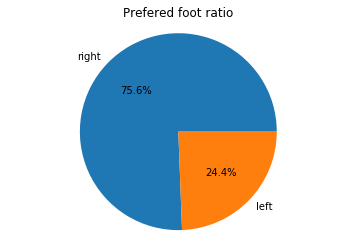

In [70]:
my_data = [135216,43640]
my_labels = 'right','left'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Prefered foot ratio')
plt.axis('equal')
plt.show()

## Players prefer to play with their right foot with a ratio of 3:1 in comparision with the left foot 

In [71]:
def display_barplot(variable1,variable2, xlabel, ylabel, title):
    plt.figure(figsize=(8,8));
    plt.barh(variable1, variable2)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);


### How many matches played per season?

In [72]:
matchCounts = Match_Teams['season'].value_counts()
seasons = Match_Teams['season'].unique()

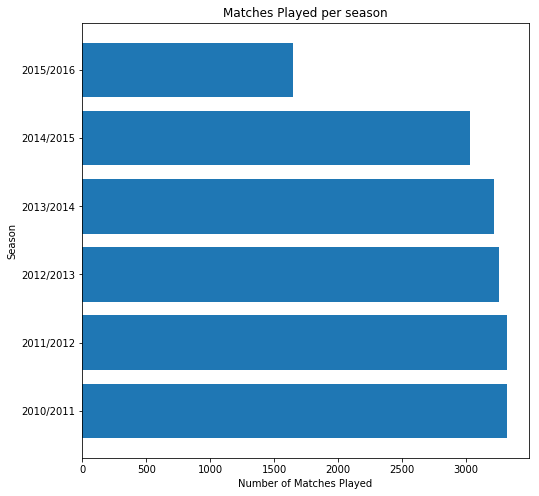

In [73]:
display_barplot(seasons,matchCounts,'Number of Matches Played','Season','Matches Played per season')


## Throughout the years the number of matches per season decreased significantly from on average of 3000 matches to 1500

### What is the ratio between height and weight of players ?

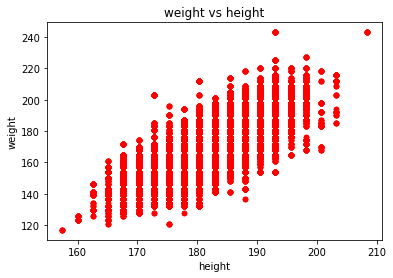

In [74]:
# a scatter plot comparing num_children and num_pets
Player_info.plot(kind='scatter',x='height',y='weight',color='red')
plt.title("weight vs height")
plt.show()

## The ratio between height and weight is proportional as the height increase the weight increase as well

### Who scores more goal home or away team ?

In [75]:
homeCounts = Match_Teams['home_team_goal'].value_counts()[0]
awayCounts = Match_Teams['away_team_goal'].value_counts()[0]

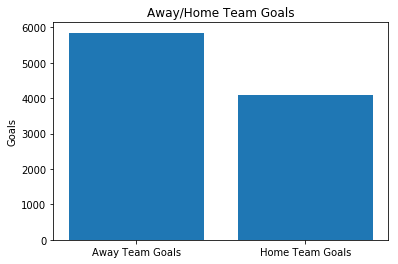

In [76]:
plt.bar(['Home Team Goals', 'Away Team Goals'], [homeCounts, awayCounts])
plt.ylabel('Goals')
plt.title('Away/Home Team Goals')
plt.show()

## Away Teams score more goals in their matches than the Home Teams

## What is the realtion between player's attacking work rate and the penalties they get ?

In [87]:
tmp = Player_info[['attacking_work_rate', 'penalties']].copy()
tmp.head()

,attacking_work_rate,penalties
0,medium,48.0
1,medium,48.0
2,medium,48.0
3,medium,47.0
4,medium,47.0


In [108]:
result = tmp.groupby(['attacking_work_rate']).sum()

,penalties
attacking_work_rate,
high,2596296.0
low,434675.0
medium,6663662.0


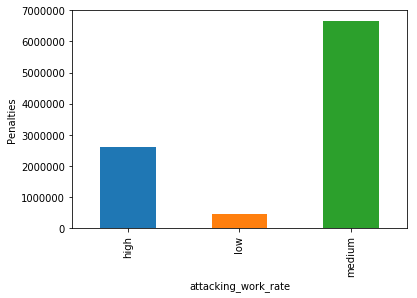

In [77]:
Player_info.groupby('attacking_work_rate')['penalties'].sum().plot(kind='bar')
plt.ylabel('Penalties')
plt.show()

## Results show that players who do medium attacking work get offered the highest number of penalties

<a id='conclusions'></a>
## Conclusions

> *Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

> To conclude, the dataset shows that teams score more while playing on away courts. It also shows that player's height and weight are directly proportional. Moreover, the higher the attacking rate of players is the higher the chance they will be given a penalty in the match.

> Limitations : The dataset had null values in almost all players' columns in table Match, which lead to inaccurate results based on player's performance. Also, there was no key paired for match and player information to analyze player attributes that have high/low impact on the match.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0